In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import subprocess
import matplotlib.pyplot as plt
import math

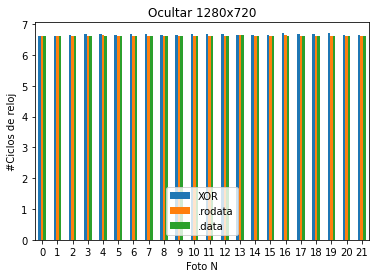

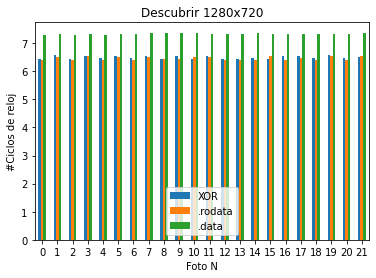

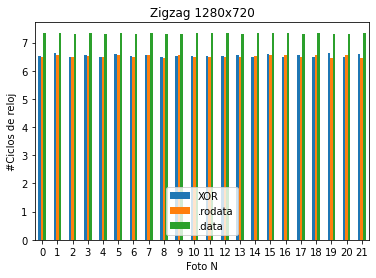

In [2]:
filters=['Ocultar', 'Descubrir', 'Zigzag']
tamano='1280x720'
data=[]
for filter in filters:
    ASM1 = open("./" + filter + "/"+ filter + "ASM1")
    ASMrodata = open("../Variables en rodata/" + filter + "/"+ filter + "ASM1")
    ASMdata = open("../Variablen en data/" + filter + "/"+ filter + "ASM1")
    datos=[0,0,0,0]
    count=0
    for line in ASM1:
        rodata=ASMrodata.readline()
        datA=ASMdata.readline()
        if count < 22:
            if line[2:20] == 'Archivo de entrada':
                entradaASM1 = line.split(":")[1].split("/")[2]
                entradaASM2 = rodata.split(":")[1].split("/")[2]
                datos[0]=entradaASM1.strip("\n")
            if line[2:31] == '# de ciclos insumidos totales':
                cantCiclosASM1 = line.split(":")[1]
                cantCiclosASMrodata = rodata.split(":")[1]
                cantCiclosASMdata = datA.split(":")[1]
                datos[1]=math.log(int(cantCiclosASM1)/20,10)
                datos[2]=math.log(int(cantCiclosASMrodata)/20,10)
                datos[3]=math.log(int(cantCiclosASMdata)/20,10)
                data.append(datos)
                datos=[0,0,0,0]
                count+=1
        if count == 22:
            count+=1
            a=pd.DataFrame(data,columns=['Archivo de entrada','XOR','.rodata','.data']);
            ax = a.plot.bar(rot=0, title= filter +' '+ str(tamano))
            ax.set_xlabel("Foto N")
            ax.set_ylabel("#Ciclos de reloj")
            ax.legend(loc='lower center')
            fig = ax.get_figure()
            fig.savefig("./" + filter + "/" + filter)
            data=[]

 if filter== 'Zigzag':
            if count < 14:
                if line[2:20] == 'Archivo de entrada':
                        entradaASM = line.split(":")[1].split("/")[4]
                        entradaC = lineC.split(":")[1].split("/")[4]
                        datos[0]=entradaASM.strip("\n")      
                if line[2:31] == '# de ciclos insumidos totales':
                    cantCiclosASM = line.split(":")[1]
                    cantCiclosC = lineC.split(":")[1]
                    datos[1]=int(cantCiclosASM)
                    datos[2]=int(cantCiclosC)
                    data.append(datos)
                    datos=[0,0,0]
                    count=count +1
            if count == 14:
                count=count +1
                print(str(filter))
                a=pd.DataFrame(data,columns=['Archivo de entrada','Ciclos ASM','Ciclos C']);
                ax = a.plot.bar(rot=0)
                data=[]